<a href="https://colab.research.google.com/github/vgarcialopezm/ABC-SMC/blob/main/LV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm, uniform, multivariate_normal
from scipy.optimize import minimize
from scipy.special import logsumexp
import sys,ast
from random import choices,seed,random
from tqdm import tqdm
#import p_tqdm
from functools import partial
import os
import matplotlib.pyplot as plt


epsilons=[30.0,16.0,6.0,4.3,3.5,2.1,1.2,0.8,0.2,0.08]
#epsilons=[16.0,12.0,11.8,11.3,10.6,7.1,5.2]

parametros=[1,1,1,1]
print(type(parametros))

params_lotka_volterra = [ # list of parameters used in the lotka volterra model 
    {'name' : 'a', 'lower_limit':0.0,'upper_limit':10.0},# growing rate of prey in absence of repressor
    {'name' : 'b','lower_limit':0.0,'upper_limit':10.0},#susceptibility of prey 
    {'name' : 'c','lower_limit':0.0,'upper_limit':10.0},# extinction rate of predator
    {'name' : 'd','lower_limit':0.0,'upper_limit':10.0}# benefit of predator
]

<class 'list'>


In [2]:
def euc_dist(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        distance = np.linalg.norm(data1 - data2)
        print('dist',data1 - data2)

    if distance < 0:
        return [None]
    else:
        return distance


In [3]:

def euc_disti(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        z =np.array((data1[:,0] - data2[:,0])**2+ (data1[:,1] - data2[:,1])**2)
        #print (z)
        distance=np.sum(z)

    if distance < 0:
        return [None]
    elif np.isnan(distance):
      distance=100000
      return distance
    else:
        return distance



In [4]:
def prior():
### Generate a random parameter inside the limits stablished. The shape of the distribution can be changed if required
    prior = []
    for ipar,par in enumerate(params_lotka_volterra):
        prior.append(uniform.rvs(loc = par['lower_limit'],
                                 scale = par['upper_limit'])) #par['upper_limit']))
        
       
    return prior


In [5]:
#function that given the values of the parameters, calculates the 

def evaluate_prev_pru(params):
    print('parameters',params)
    l=len(params)
    prior = 1
    for ipar,par in enumerate(params_lotka_volterra):
    #for i in range(l):
        prior *= uniform.pdf(params[ipar],loc = par['lower_limit'],
                                 scale = par['upper_limit'])
        if prior==0:
            break   
      #  print('params i', params[i])
       # print('prior',prior)
    return prior


In [6]:
#function that, given a list of parameters sampled, perturbs it by applying a multivariate normal kernel
#function that, given a list of parameters sampled, perturbs it by applying a multivariate normal kernel
def perturbi(listaprev,s):
    #print(listaprev)
    lista=np.asarray(listaprev) #.tolist()
    #mean_vec=np.mean(lista)
    k=uniform.rvs(loc = -0.1,scale = 0.2)
    cov_matrix=2.0*np.cov(lista.T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
    kernel=multivariate_normal(cov=cov_matrix)
    pert=s+k # here we obtain the list of perturbed parameters
    pertur=pert.tolist()
    return pertur


In [7]:
def perturb(listaprev,s):
    #print(listaprev)
    lista=np.asarray(listaprev) #.tolist()
    #mean_vec=np.mean(lista)
    cov_matrix=2.0*np.cov(lista.T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
    kernel=multivariate_normal(cov=cov_matrix)
    pert=s+kernel.rvs() # here we obtain the list of perturbed parameters
    pertur=pert.tolist()
    return pertur


In [8]:

def rk4(f,in_c,t,params):
    #params=[a,b,c,d]
    #h=t[1]-t[0]
    n=len(t)
    X  = np.zeros([n,len(in_c)],dtype=np.float64)
    X[0]=in_c
    for i in range(n-1):
      h=t[i+1]-t[i]
      k1=f(t[i],X[i],*params)
      k2=f(t[i]+h/2.,X[i]+k1*h/2.,*params)
      k3=f(t[i]+h/2,X[i]+k2*h/2.,*params)
      k4=f(t[i]+h,X[i]+k3*h,*params)
    
      X[i+1]=X[i]+h*(k1/6.+k2/3.+k3/3.+k4/6.)
     
    return X

In [9]:
def lotka_volterra(t,X,a,b,c,d):
    x,y=X
    dx=a*x-b*x*y
    dy=c*x*y-d*y
    return np.array([dx,dy],dtype=np.float64)

X0=[1,0.5]
#t=np.linspace()
t=[1.1, 2.4, 3.9, 5.6, 7.5, 9.6, 11.9, 14.4]
t1=np.linspace(0,15,1000)

In [12]:
data1_c=np.array([[1.87, 0.65, 0.22, 0.31, 1.64, 1.15, 0.24, 2.91],[0.49, 2.62, 1.54, 0.02, 1.14, 1.68, 1.07, 0.88]]).T

def add_noise(mu,sigma,data):
    noise=np.random.normal(mu,sigma)
    data_noise=data+noise
    return data_noise
print('\n')
data1_noise=add_noise(0,0.5,midata)
print('data1 noise',data1_noise)


NameError: ignored

In [11]:
data1=rk4(lotka_volterra,X0,t1,parametros)
data1

array([[1.        , 0.5       ],
       [1.00753562, 0.50002825],
       [1.01512716, 0.5001133 ],
       ...,
       [1.64770903, 1.33001189],
       [1.63940556, 1.34292658],
       [1.63082821, 1.35579484]])

Text(0, 0.5, 'populations density')

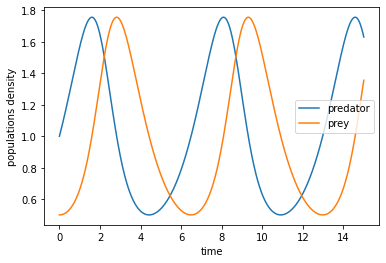

In [13]:
plt.figure()
plt.plot( t1, data1[:,0],label='predator')
plt.plot( t1, data1[:,1],label='prey')
plt.legend()
plt.xlabel('time')
plt.ylabel('populations density')
#plt.plot(t,data1_c[:,0],'o')
#plt.plot(t,data1_c[:,1],'*')
#plt.plot( t, data3,'x')

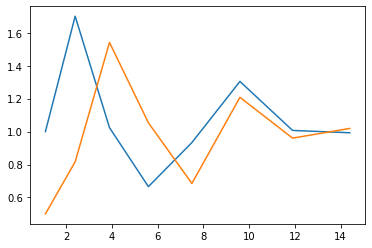

In [14]:
midata=rk4(lotka_volterra,X0,t,parametros)
midata
plt.figure()
plt.plot( t, midata)

In [ ]:
euc_dist(midata,data1_noise)

In [15]:



#function that gives the denominator used to calculate the weights of every particle.
def weighting(i,j,N,sam,wei,sampre):
     denom=0
     #ker=1
     samprev=np.asarray(sampre)
     cov_matrix=2.0*np.cov(samprev.T)
     kernel=multivariate_normal(cov=cov_matrix)
     for k in range(N):
            #print('sample i j',type(sam[k]),sam[k])
           # print('sample i-1,j',type(sampre[k]),sampre[k])
            sampre[k]=np.array(sampre[k])
            #print('sampre',sampre[k])
            #cov_matrix=2.0*np.cov((sampre[k]).T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
            #print('cov',cov_matrix)
            #kernel=multivariate_normal(cov=cov_matrix)
            # print('wei',wei[i-1,k])
            #print('sam[j]',sam[j])
            #print('sampre[k]',sampre[k])
            ker=kernel.pdf(sam[j]-sampre[k])
            #print('ker',ker)
            #kerne=np.prod(ker)  #here we are obtaining the joint probability of the parameter vector obtained when applying the kernel
            denom+=wei[k]*ker #kerne
            #print('kernel',kernel.cdf(sam[k]-sampre[k]))
     #print('den',denom)      
     return denom


    


In [16]:
#function used to normalize the weights
def normalize(wei):
    #normalized=wei/np.linalg.norm(wei)
    normalized=wei/np.sum(wei)
    return normalized  



In [17]:
def principal(epsilons,listaparametros,N,data1,t):
   # accepted_distances = np.loadtxt('smc/distances_{}_{}_{}_{}.out'.format(model,sto,gamma,prior_label))
    T=len(epsilons)
    weight=np.zeros((T,N),float)
    dist=np.zeros((T,N),float)
    sample=np.zeros((T,N),list)
    X0=[1.0,0.5]
    #t=np.linspace(0.,10,10)
    for i in range(T):
        count=0
        counti=0
        label=i
        print("SMC step with target distance: {}".format(epsilons[i]))
        if i==0:
            for j in range (N):
                dist[i,j]=epsilons[i]+1
                while dist[i,j]>epsilons[i]:
                    sample[i,j]=prior()
                    #sample[i,j]=np.array(prior())
                    sample[i,j]=np.asarray(sample[i,j])
                    data2= rk4(lotka_volterra,X0,t,sample[i,j])
                    #print('data2',data2)
                    #data2=np.array(data2, dtype=np.float64)
                    dist[i,j]=euc_disti(data1,data2)
                    #print('distcondata2',dist[i,j])
                count+=1
                print(count)
       
        else:
        
            for j in range (N):
                dist[i,j]=epsilons[i]+1
                while dist[i,j]>epsilons[i]:
                    seed()
                    np.random.seed()
                    choose = choices(sample[i-1,:], weights = weight[i-1,:],k=1)[0] # select a point from the previous sample
                    sample[i,j]=choose
                    #print("before perturb",type(sample[i,j]))
                    #print("before perturb",list(sample[i-1,:]))
                    sample[i,j] = perturb(list(sample[i-1,:]),sample[i,j]) # and perturb it
                    #print("after perturb", sample[i,j])
                    #print("after perturb", type(sample[i,j]))
                    evaluation=evaluate_prev_pru(sample[i,j]) 
                    if evaluation>0:
                        data2=rk4(lotka_volterra,X0,t,sample[i,j])
                        data2=np.array(data2)
                        #print('data2',data2)
                        dist[i,j]=euc_disti(data1,data2)
                        print('distendata2',dist[i,j])
                counti+=1
                print(counti)
        for j in range(N):
            if i==0:
                weight[i,j]=1
               # print(weight[i,j])
            else:
                denom=weighting(i,j,N,sample[i,:],weight[i-1,:],list(sample[i-1,:]))
                weight[i,j]=evaluate_prev_pru(sample[i,j])/denom
        #print('weight[i,:]',weight[i,:])
        if i!=0:
           weight[i,:]=normalize(weight[i,:])
           #print('weight[i,:] normalized',weight[i,:])
        #pars = np.loadtxt('smc_van/pars_{}.out'.format(i))
        #weights = np.loadtxt('smc_van/weights_{}.out'.format(i))
        #np.savetxt('smc_van/pars_{}.out'.format(i), sample[T-1,:])
        #np.savetxt('smc_van/weights_{}.out'.format(i), weight[T-1,:])
      #  np.savetxt('smc/distances_{}.out'.format(label), accepted_distances)
    #print('sample',sample[T-1,N-1])
    #print('weight',weight[T-1])
    #print('dist',dist[T-1])
    return sample, weight, dist,data2


In [18]:
sample,weight,dist,data2=principal(epsilons,params_lotka_volterra,100,midata,t)

SMC step with target distance: 30.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


1
2
3
4
5
6
7
8
9
10
11
12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in add
  



13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Se han truncado las últimas 5000 líneas del flujo de salida.
distendata2 2.459791871432697
parameters [0.4610052761336394, 0.28916741573587845, 1.616142537049514, 1.607100749444034]
distendata2 7.977418709170646
parameters [0.8807092136383998, 0.9324127838291875, 1.3532706370975514, 1.3985456221735266]
distendata2 0.33850912829680113
parameters [0.9609212098095079, 1.1299686246689409, 1.066078429904107, 1.0352860348752362]
distendata2 0.2894982606497892
parameters [0.9391565415690597, 0.8747019204691187, 0.9607217737078199, 0.9293878557907806]
distendata2 0.7153992471215026
parameters [1.5684746795914557, 1.9235315171136773, 0.535400713832729, 0.33576722332159]
distendata2 2.224197613662459
parameters [1.0698082774173114, 1.154132557790325, 1.00768243026479, 0.9353862462151598]
distendata2 0.1437024134713537
parameters [0.6261991022857748, 0.6996340208678266, 1.454979032391115, 1.4352604379876357]
distendata2 0.38686813439288026
parameters [0.9169449144309028, 0.888038648995435, 1.3692

In [19]:

print("min accepted distance: ",np.min(dist[-1,:]))
print("median accepted distance: ",np.median(dist[-1,:]))
#print("median evaluated distance: ",np.median(evaluated_distances))


min accepted distance:  0.005226529671041907
median accepted distance:  0.058808461551098146


In [27]:
#np.median(sample[-1,:])
np.var(sample[-1,0])
sample[-1,:]

array([list([0.9382944770061419, 0.9694741245010081, 1.0375688289542337, 1.0982221006246122]),
       list([1.0523464156671136, 1.1107437358380357, 0.9306461686618202, 0.9299356406575079]),
       list([0.9868609856762377, 0.9985866724646284, 1.0131613644438038, 1.0762700073708105]),
       list([0.8381641940619952, 0.7983178732671703, 1.2597724459682946, 1.2342954270101985]),
       list([1.006030194429755, 0.9331371616451022, 1.0101514372614102, 1.0262010836613402]),
       list([1.1334831254443782, 1.1524360722306728, 0.9507911435248394, 0.9653500658035303]),
       list([0.8246945609705998, 0.8211582824486965, 1.281504765366153, 1.235975805188886]),
       list([0.887305982290929, 0.8791893262703688, 1.1620403041557292, 1.126957366012379]),
       list([1.0919616479187735, 1.1290934046246401, 0.9467140511574529, 0.9232365385509366]),
       list([0.8096271743586216, 0.7909617753231726, 1.2721085304188573, 1.2827479735076397]),
       list([0.9529293286571227, 0.9472098786308102, 1.

In [29]:
parama=[]
for j in sample[-1,:]:
    parama.append(j[0])
    


0.014728155937961533

In [30]:
amean=np.mean(parama)
amed=np.median(parama)
avar=np.var(parama)
print('mean',amean)
print('median',amed)
print('variance',avar)

mean 0.9864311582519014
median 0.9786242867361392
variance 0.014728155937961533


In [44]:
paramb=[]
for j in sample[-1,:]:
    paramb.append(j[1])
    

In [45]:
bmean=np.mean(paramb)
bmed=np.median(paramb)
bvar=np.var(paramb)
print('mean',bmean)
print('median',bmed)
print('variance',bvar)

mean 0.9889941601698315
median 0.9898485807674556
variance 0.019510697776736644


In [46]:
paramc=[]
for j in sample[-1,:]:
    paramc.append(j[2])
    


In [47]:
cmean=np.mean(paramc)
cmed=np.median(paramc)
cvar=np.var(paramc)
print('mean',cmean)
print('median',cmed)
print('variance',cvar)

mean 1.0448538668852962
median 1.04476752794361
variance 0.018700560792655273


In [48]:
paramd=[]
for j in sample[-1,:]:
    paramd.append(j[3])
    

In [49]:
dmean=np.mean(paramd)
dmed=np.median(paramd)
dvar=np.var(paramd)
print('mean',dmean)
print('median',dmed)
print('variance',dvar)

mean 1.0528750771893898
median 1.049586439445191
variance 0.01991477120411618


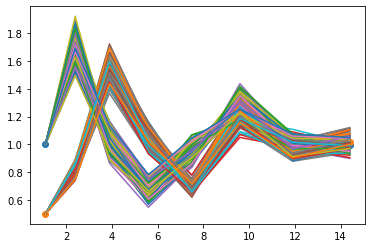

In [50]:
plt.figure()
plt.plot(t,midata,'o')
for i in sample[-1,:]:
    data=rk4(lotka_volterra,X0,t,i)
    plt.plot(t,data)
plt.show()

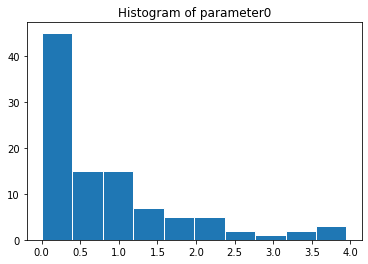

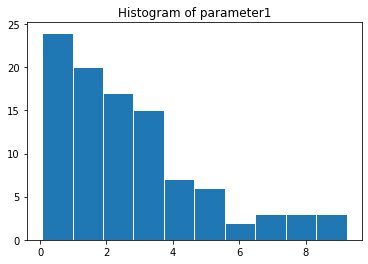

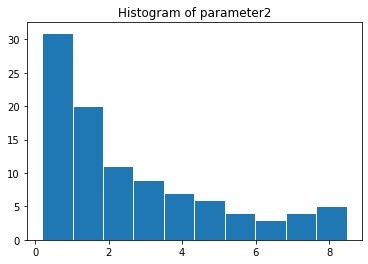

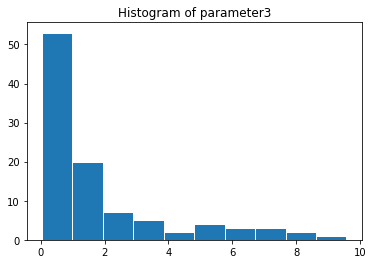

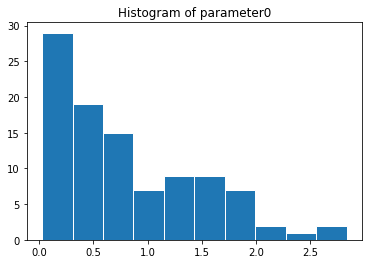

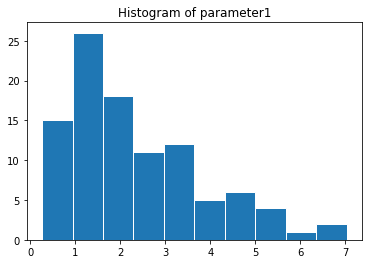

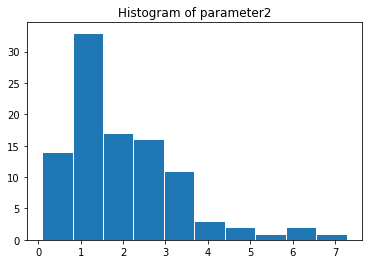

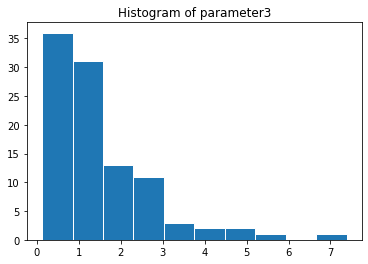

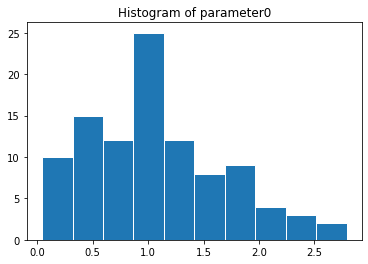

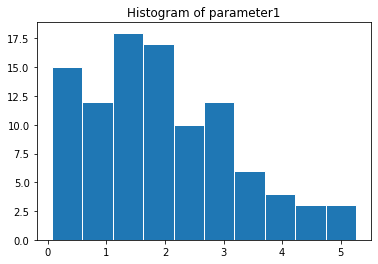

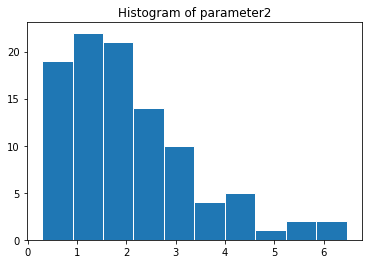

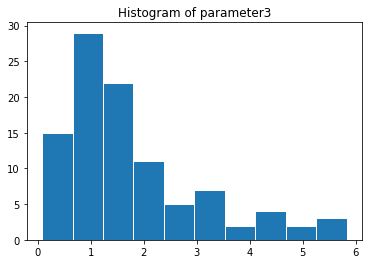

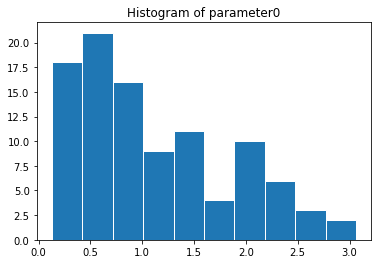

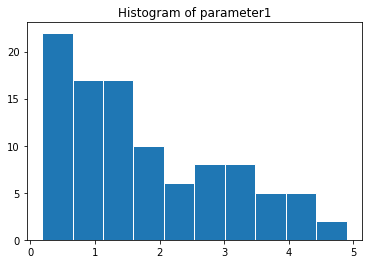

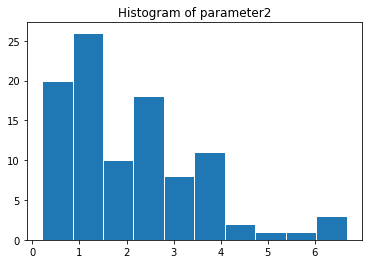

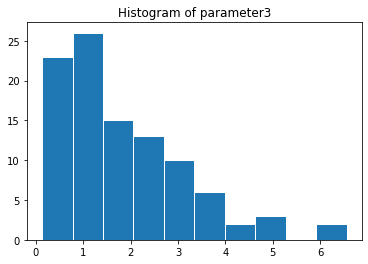

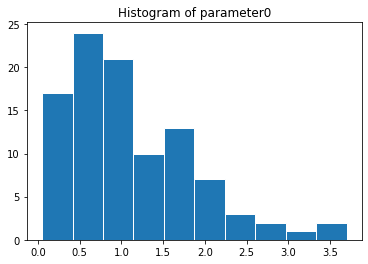

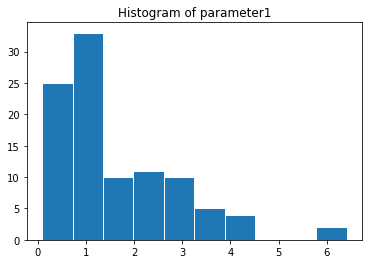

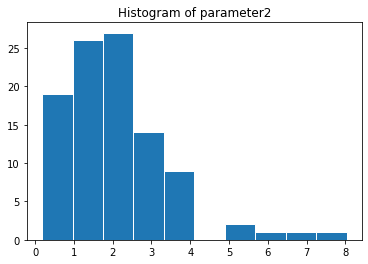

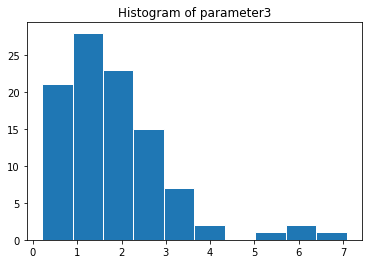

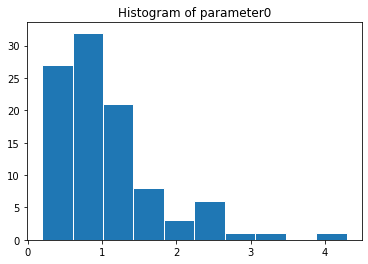

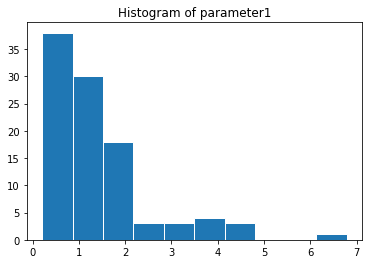

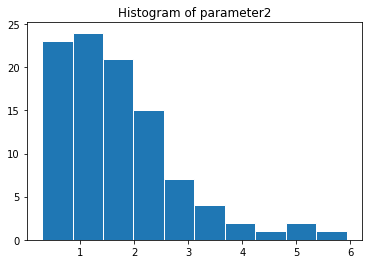

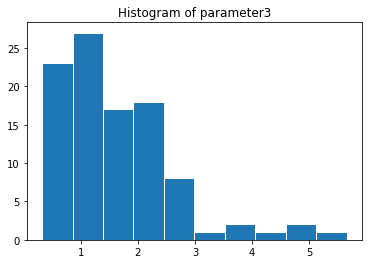

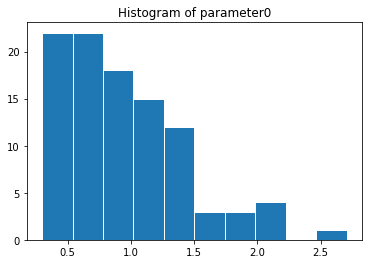

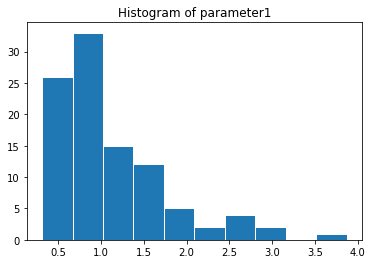

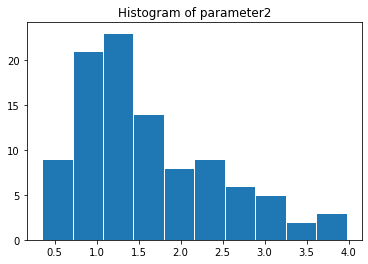

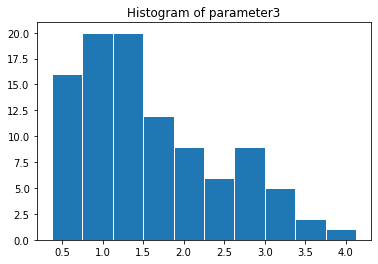

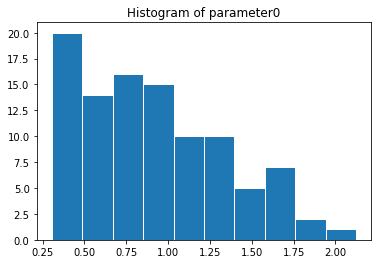

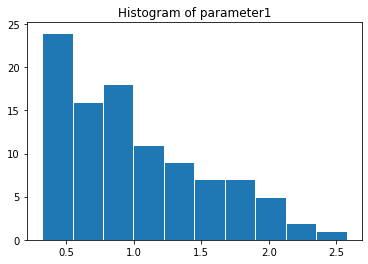

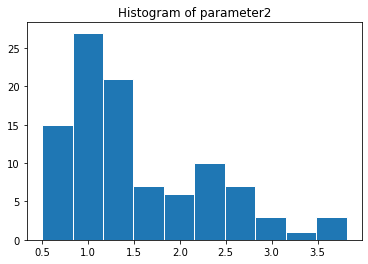

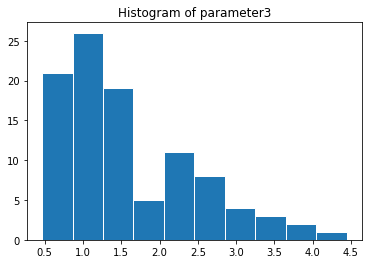

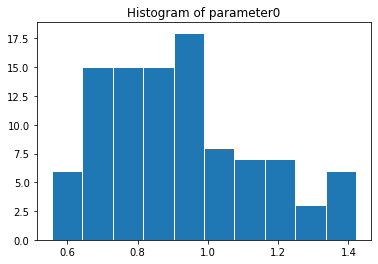

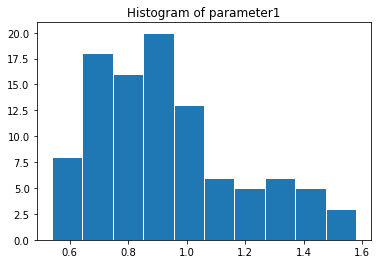

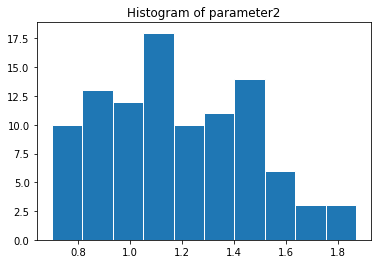

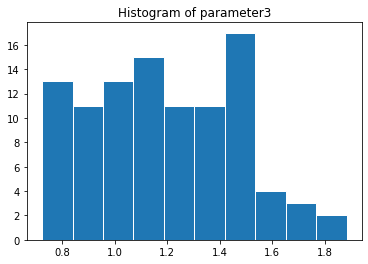

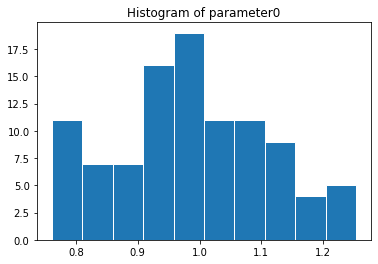

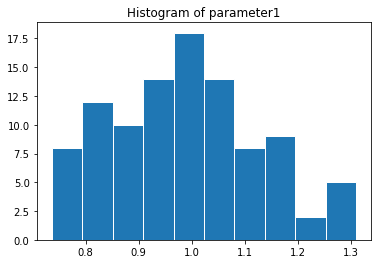

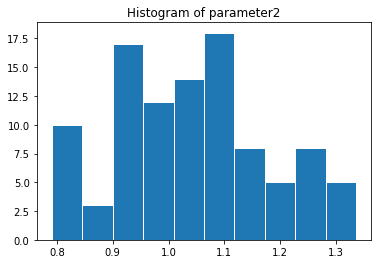

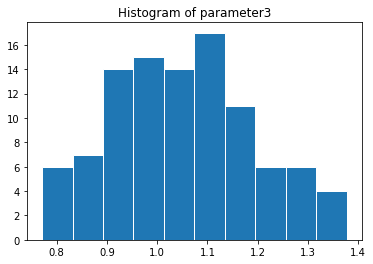

In [51]:
for k in range(len(epsilons)):
    for j in range(len(params_lotka_volterra)):
        plt.figure()
        b=[]
        for i in sample[k,:]:
            b.append(i[j])
        al=np.histogram(b)
        n,bins,patches=plt.hist(b,edgecolor='white')
        plt.title('Histogram of parameter'+str(j))
    plt.show()
plt.show()


In [52]:
print("min accepted distance: ",np.min(dist))

min accepted distance:  0.005226529671041907


In [53]:
mindis=np.min(dist[-1,:])
np.where(dist==mindis)

(array([9]), array([94]))

In [ ]:
maxdis=np.max(dist[-1,:])
np.where(dist==maxdis)

In [54]:
mindis

0.005226529671041907

In [ ]:
dist[-1,:]

In [55]:
data4=rk4(lotka_volterra,X0,t,sample[-1,94])

Text(0, 0.5, 'populations density')

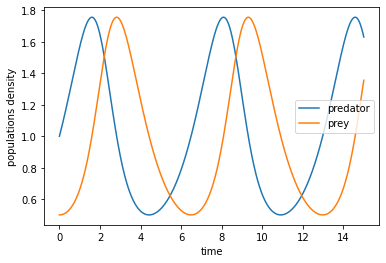

In [56]:
plt.figure()
plt.plot( t1, data1[:,0],label='predator')
plt.plot( t1, data1[:,1],label='prey')
plt.legend()
plt.xlabel('time')
plt.ylabel('populations density')
#plt.plot(t,data1_c[:,0],'o')
#plt.plot(t,data1_c[:,1],'*')
#plt.plot( t, data3,'x')

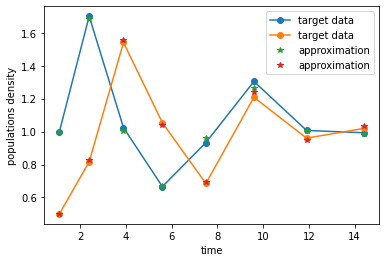

In [57]:
plt.figure()
plt.plot()
plt.plot(t,midata,'o-',label='target data')
plt.plot(t,data4,'*',label='approximation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('populations density')
plt.show()